In [ ]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from glob import glob
import seaborn as sns
import scipy
import os
import re

In [ ]:
def lastFitnessExtract(file):
    """
        file: history file per trial
    """
    
    # extract only last global fitness
    f = open(file, "r")
    lines = f.readlines()
    trialData = [re.findall(r"-?\ *[0-9]+\.?[0-9]*(?:[Ee]\ *-?\ *[0-9]+)?", line) for line in lines]
    return float(trialData[-1][2])

In [ ]:
def lastFitnessHistoryExtract(trialFolder):
    # extract every last global fitness in any trials of testcase
    fitnessHistory = []
    for file in glob(f"{trialFolder}\\*\\*\\e=1000p=100_history.txt"):
        fitnessHistory.append(lastFitnessExtract(file))
    return fitnessHistory

In [4]:
lastFitnessHistoryExtract("D:\\QuantumResult\\historyAPR\\ga\\CEC2021\\F102021\\Ibm")

[484.307203811946,
 562.1163770969243,
 479.1537155168411,
 480.122354414941,
 480.2872219055654,
 487.93257310578315,
 479.8522063390892,
 507.9430919575386,
 483.6572099523271,
 483.36278627461326,
 482.2825701237193,
 508.5373676568135,
 484.73253846797274,
 481.3542223311614,
 508.05711165229314,
 480.78529598287673,
 481.0671500641343,
 479.0181647398038,
 480.91303467573664,
 560.7703811416055,
 483.20332888842336,
 487.71394306357007,
 479.30097213386443,
 479.90095677683695,
 481.0256667937716,
 482.25597627502583,
 478.57047254775773,
 509.0251670906539,
 483.3535495963449,
 508.04728804643094]

In [ ]:
def statReport(lastFitnessHistory, problem):
    # find statistical value considered to population quality
    # best: the most optimal solution in any trials show the positive limitation of searching
    # mean: the general case of result of optimization
    # var: the consistence of result of optimization
    best = np.min(lastFitnessHistory)
    if problem == "maxcut":
        print("maxcut")
        best = np.max(lastFitnessHistory)
    mean = np.mean(lastFitnessHistory)
    var = np.var(lastFitnessHistory)
    return best, mean, var

In [ ]:
def createModelSummary(dataFolder):
    # read data from directory
    columns=["algo", "problem", "testcase", "rng", "best", "mean", "var"]
    matrixData = []

    for algoFolder in glob(f"{dataFolder}\\*"):
        algo = os.path.basename(algoFolder)
        for problemFolder in glob(f"{algoFolder}\\*"):
            problem = os.path.basename(problemFolder)
            for testCaseFolder in glob(f"{problemFolder}\\*"):
                testCase = os.path.basename(testCaseFolder)
                for rngFolder in glob(f"{testCaseFolder}\\*"):
                    rng = os.path.basename(rngFolder)
                    print(testCase, problem, rngFolder)
                    lastFitnessHistory = lastFitnessHistoryExtract(rngFolder)
                    stat = statReport(lastFitnessHistory, problem)
                    matrixData.append([algo, problem, testCase, rng,
                                          stat[0], stat[1], stat[2]])

    df_main = pd.DataFrame(matrixData, columns=columns)
    
    return df_main

In [7]:
statValueDf = createModelSummary("D:\\QuantumResult\\historyAPR")

F102021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F102021\BeamSplitter
F102021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F102021\Ibm
F102021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F102021\Mt19937
F102021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F102021\QuasiRandom
F12021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F12021\BeamSplitter
F12021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F12021\Ibm
F12021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F12021\Mt19937
F12021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F12021\QuasiRandom
F22021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F22021\BeamSplitter
F22021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F22021\Ibm
F22021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F22021\Mt19937
F22021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F22021\QuasiRandom
F32021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F32021\BeamSplitter
F32021 CEC2021 D:\QuantumResult\historyAPR\ABC\CEC2021\F32021\

In [8]:
save = statValueDf.copy()
save

,algo,problem,testcase,rng,best,mean,var
0,ABC,CEC2021,F102021,BeamSplitter,478.726485,480.731605,1.603637e+00
1,ABC,CEC2021,F102021,Ibm,478.775681,480.538011,1.852840e+00
2,ABC,CEC2021,F102021,Mt19937,479.149123,480.572250,5.115912e-01
3,ABC,CEC2021,F102021,QuasiRandom,478.814450,493.556122,1.873110e+02
4,ABC,CEC2021,F12021,BeamSplitter,3261.551820,26203.603085,2.831871e+08
...,...,...,...,...,...,...,...
235,PSO,tsp,Pr76,QuasiRandom,430155.482771,455174.177159,7.988542e+07
236,PSO,tsp,St70,BeamSplitter,2748.137467,2847.416915,1.482553e+03
237,PSO,tsp,St70,Ibm,2750.439687,2861.972744,2.216844e+03
238,PSO,tsp,St70,Mt19937,2761.532598,2841.060619,2.283301e+03


In [ ]:
# rank best and mean value; for max-cut problem, the highest value is better, other 2 problems are opposite (higher value is better).
nonMaxcut = save[save["problem"] != "maxcut"].groupby(
    ["testcase", "algo"])[["best","mean"]].rank("average", ascending= True)
maxcut = save[save["problem"] == "maxcut"].groupby(
    ["testcase", "algo"])[["best","mean"]].rank("average", ascending= False)

In [10]:
nonMaxcut

,best,mean
0,1.0,3.0
1,2.0,1.0
2,4.0,2.0
3,3.0,4.0
4,2.0,2.0
...,...,...
235,1.0,4.0
236,2.0,2.0
237,3.0,4.0
238,4.0,1.0


In [ ]:
# summary rank into one table
save["rank_best"] = pd.concat([nonMaxcut, maxcut]).sort_index()["best"]
save["rank_mean"] = pd.concat([nonMaxcut, maxcut]).sort_index()["mean"]
save["rank_var"] = save.groupby(["testcase", "algo"])[["var"]].rank("average", ascending= True)
save

,algo,problem,testcase,rng,best,mean,var,rank_best,rank_mean,rank_var
0,ABC,CEC2021,F102021,BeamSplitter,478.726485,480.731605,1.603637e+00,1.0,3.0,2.0
1,ABC,CEC2021,F102021,Ibm,478.775681,480.538011,1.852840e+00,2.0,1.0,3.0
2,ABC,CEC2021,F102021,Mt19937,479.149123,480.572250,5.115912e-01,4.0,2.0,1.0
3,ABC,CEC2021,F102021,QuasiRandom,478.814450,493.556122,1.873110e+02,3.0,4.0,4.0
4,ABC,CEC2021,F12021,BeamSplitter,3261.551820,26203.603085,2.831871e+08,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
235,PSO,tsp,Pr76,QuasiRandom,430155.482771,455174.177159,7.988542e+07,1.0,4.0,4.0
236,PSO,tsp,St70,BeamSplitter,2748.137467,2847.416915,1.482553e+03,2.0,2.0,2.0
237,PSO,tsp,St70,Ibm,2750.439687,2861.972744,2.216844e+03,3.0,4.0,3.0
238,PSO,tsp,St70,Mt19937,2761.532598,2841.060619,2.283301e+03,4.0,1.0,4.0


In [12]:
save[save["problem"] == "CEC2021"].head(60)

,algo,problem,testcase,rng,best,mean,var,rank_best,rank_mean,rank_var
0,ABC,CEC2021,F102021,BeamSplitter,478.726485,480.731605,1.603637e+00,1.0,3.0,2.0
1,ABC,CEC2021,F102021,Ibm,478.775681,480.538011,1.852840e+00,2.0,1.0,3.0
2,ABC,CEC2021,F102021,Mt19937,479.149123,480.572250,5.115912e-01,4.0,2.0,1.0
3,ABC,CEC2021,F102021,QuasiRandom,478.814450,493.556122,1.873110e+02,3.0,4.0,4.0
4,ABC,CEC2021,F12021,BeamSplitter,3261.551820,26203.603085,2.831871e+08,2.0,2.0,1.0
5,ABC,CEC2021,F12021,Ibm,993.616433,25812.012629,4.293231e+08,1.0,1.0,2.0
6,ABC,CEC2021,F12021,Mt19937,3953.296354,28026.978479,8.403071e+08,3.0,3.0,3.0
7,ABC,CEC2021,F12021,QuasiRandom,6319.755260,44092.059692,3.166717e+09,4.0,4.0,4.0
8,ABC,CEC2021,F22021,BeamSplitter,746.505256,1138.843002,2.808883e+04,1.0,1.0,4.0
9,ABC,CEC2021,F22021,Ibm,823.524931,1177.449711,1.897519e+04,2.0,3.0,3.0


In [ ]:
# find mean of rank
save["mean_of_ranks"] = (save["rank_best"] + save["rank_mean"]+ save["rank_var"])/3.0
save

,algo,problem,testcase,rng,best,mean,var,rank_best,rank_mean,rank_var,mean_of_ranks
0,ABC,CEC2021,F102021,BeamSplitter,478.726485,480.731605,1.603637e+00,1.0,3.0,2.0,2.000000
1,ABC,CEC2021,F102021,Ibm,478.775681,480.538011,1.852840e+00,2.0,1.0,3.0,2.000000
2,ABC,CEC2021,F102021,Mt19937,479.149123,480.572250,5.115912e-01,4.0,2.0,1.0,2.333333
3,ABC,CEC2021,F102021,QuasiRandom,478.814450,493.556122,1.873110e+02,3.0,4.0,4.0,3.666667
4,ABC,CEC2021,F12021,BeamSplitter,3261.551820,26203.603085,2.831871e+08,2.0,2.0,1.0,1.666667
...,...,...,...,...,...,...,...,...,...,...,...
235,PSO,tsp,Pr76,QuasiRandom,430155.482771,455174.177159,7.988542e+07,1.0,4.0,4.0,3.000000
236,PSO,tsp,St70,BeamSplitter,2748.137467,2847.416915,1.482553e+03,2.0,2.0,2.0,2.000000
237,PSO,tsp,St70,Ibm,2750.439687,2861.972744,2.216844e+03,3.0,4.0,3.0,3.333333
238,PSO,tsp,St70,Mt19937,2761.532598,2841.060619,2.283301e+03,4.0,1.0,4.0,3.000000


In [ ]:
# rank again to get Friedman Rank
save["rank_MOF"] = save.groupby(["testcase", "algo"])[["mean_of_ranks"]].rank("dense", ascending= True)
save

,algo,problem,testcase,rng,best,mean,var,rank_best,rank_mean,rank_var,mean_of_ranks,rank_MOF
0,ABC,CEC2021,F102021,BeamSplitter,478.726485,480.731605,1.603637e+00,1.0,3.0,2.0,2.000000,1.0
1,ABC,CEC2021,F102021,Ibm,478.775681,480.538011,1.852840e+00,2.0,1.0,3.0,2.000000,1.0
2,ABC,CEC2021,F102021,Mt19937,479.149123,480.572250,5.115912e-01,4.0,2.0,1.0,2.333333,2.0
3,ABC,CEC2021,F102021,QuasiRandom,478.814450,493.556122,1.873110e+02,3.0,4.0,4.0,3.666667,3.0
4,ABC,CEC2021,F12021,BeamSplitter,3261.551820,26203.603085,2.831871e+08,2.0,2.0,1.0,1.666667,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,PSO,tsp,Pr76,QuasiRandom,430155.482771,455174.177159,7.988542e+07,1.0,4.0,4.0,3.000000,4.0
236,PSO,tsp,St70,BeamSplitter,2748.137467,2847.416915,1.482553e+03,2.0,2.0,2.0,2.000000,2.0
237,PSO,tsp,St70,Ibm,2750.439687,2861.972744,2.216844e+03,3.0,4.0,3.0,3.333333,4.0
238,PSO,tsp,St70,Mt19937,2761.532598,2841.060619,2.283301e+03,4.0,1.0,4.0,3.000000,3.0


In [ ]:
# create pivot table to summary the result
pd.pivot_table(save, values="rank_MOF", index= ["algo","problem","testcase"], columns="rng")

rng                            BeamSplitter  Ibm  Mt19937  QuasiRandom
algo problem testcase                                                 
ABC  CEC2021 F102021                    1.0  1.0      2.0          3.0
             F12021                     2.0  1.0      3.0          4.0
             F22021                     1.0  2.0      2.0          2.0
             F32021                     2.0  3.0      1.0          4.0
             F42021                     3.0  2.0      1.0          4.0
             F52021                     3.0  2.0      4.0          1.0
             F62021                     2.0  3.0      1.0          3.0
             F72021                     2.0  2.0      3.0          1.0
             F82021                     2.0  3.0      1.0          4.0
             F92021                     2.0  1.0      2.0          1.0
     maxcut  Brock200_2                 3.0  1.0      3.0          2.0
             Brock200_4                 3.0  4.0      2.0          1.0
             C125.9                     2.0  1.0      3.0          3.0
             Keller4                    2.0  1.0      3.0          4.0
             gen200_p0.9_44.b           1.0  2.0      1.0          3.0
     tsp     Berlin52                   1.0  3.0      1.0          2.0
             Bier127                    4.0  2.0      1.0          3.0
             Eil101                     3.0  2.0      1.0          4.0
             Pr76                       1.0  1.0      1.0          2.0
             St70                       2.0  3.0      4.0          1.0
GA   CEC2021 F102021                    2.0  1.0      1.0          2.0
             F12021                     2.0  1.0      2.0          3.0
             F22021                     2.0  2.0      1.0          3.0
             F32021                     2.0  3.0      1.0          4.0
             F42021                     2.0  2.0      1.0          3.0
             F52021                     3.0  4.0      1.0          2.0
             F62021                     2.0  3.0      1.0          4.0
             F72021                     1.0  2.0      3.0          4.0
             F82021                     1.0  3.0      2.0          2.0
             F92021                     2.0  1.0      3.0          4.0
     maxcut  Brock200_2                 3.0  1.0      2.0          4.0
             Brock200_4                 3.0  2.0      1.0          2.0
             C125.9                     1.0  2.0      2.0          3.0
             Keller4                    1.0  2.0      3.0          4.0
             gen200_p0.9_44.b           2.0  3.0      1.0          2.0
     tsp     Berlin52                   3.0  1.0      2.0          2.0
             Bier127                    1.0  2.0      1.0          2.0
             Eil101                     2.0  1.0      3.0          4.0
             Pr76                       2.0  4.0      1.0          3.0
             St70                       2.0  1.0      2.0          1.0
PSO  CEC2021 F102021                    4.0  2.0      3.0          1.0
             F12021                     1.0  2.0      3.0          2.0
             F22021                     2.0  2.0      1.0          3.0
             F32021                     3.0  1.0      2.0          4.0
             F42021                     1.0  2.0      1.0          3.0
             F52021                     2.0  3.0      3.0          1.0
             F62021                     3.0  2.0      1.0          1.0
             F72021                     2.0  1.0      3.0          4.0
             F82021                     3.0  2.0      3.0          1.0
             F92021                     1.0  2.0      3.0          2.0
     maxcut  Brock200_2                 1.0  2.0      3.0          4.0
             Brock200_4                 2.0  4.0      1.0          3.0
             C125.9                     3.0  1.0      2.0          2.0
             Keller4                    2.0  3.0      1.0          1.0
             gen200_p0.9

In [ ]:
# create averaged friedman rank for easier comparison
meanRank = pd.pivot_table(save, values="rank_MOF", index= ["algo","problem"], columns="rng")
meanRank

rng           BeamSplitter  Ibm  Mt19937  QuasiRandom
algo problem                                         
ABC  CEC2021           2.0  2.0      2.0          2.7
     maxcut            2.2  1.8      2.4          2.6
     tsp               2.2  2.2      1.6          2.4
GA   CEC2021           1.9  2.2      1.6          3.1
     maxcut            2.0  2.0      1.8          3.0
     tsp               2.0  1.8      1.8          2.4
PSO  CEC2021           2.2  1.9      2.3          2.2
     maxcut            2.0  2.2      2.0          2.8
     tsp               2.2  3.8      2.2          1.8

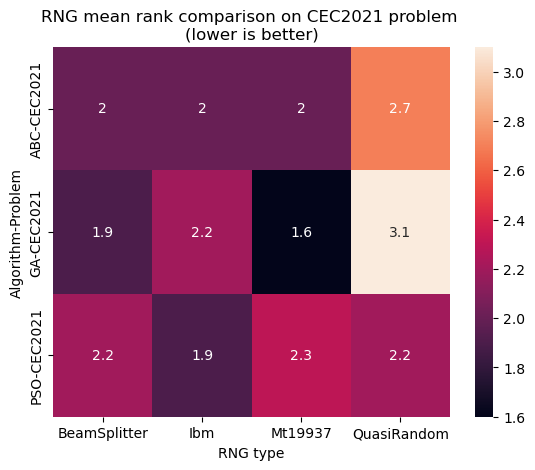

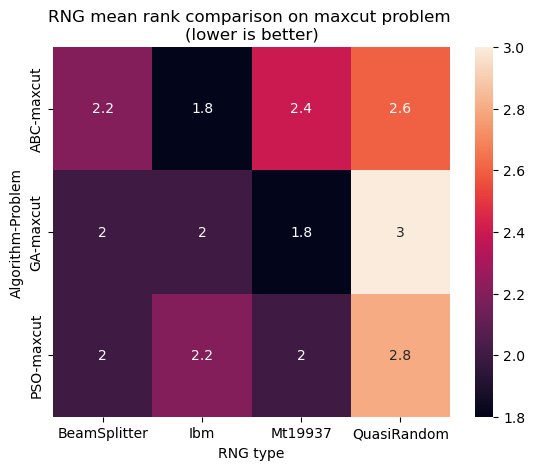

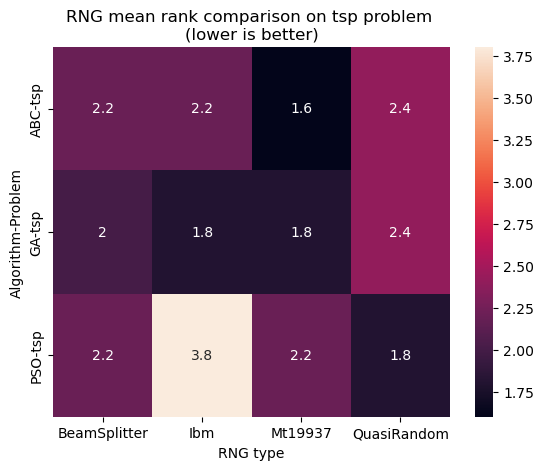

In [ ]:
# resetMeanRank = meanRank.reset_index()
for prob in ["CEC2021", "maxcut", "tsp"]:
    plt.figure()
    plt.title(f"RNG mean rank comparison on {prob} problem \n(lower is better)")
    sns.heatmap(pd.pivot_table(save[save["problem"] == prob], values="rank_MOF", index= ["algo","problem"], columns="rng"), annot=True)
    plt.xlabel("RNG type")
    plt.ylabel("Algorithm-Problem")
    plt.plot()

[]

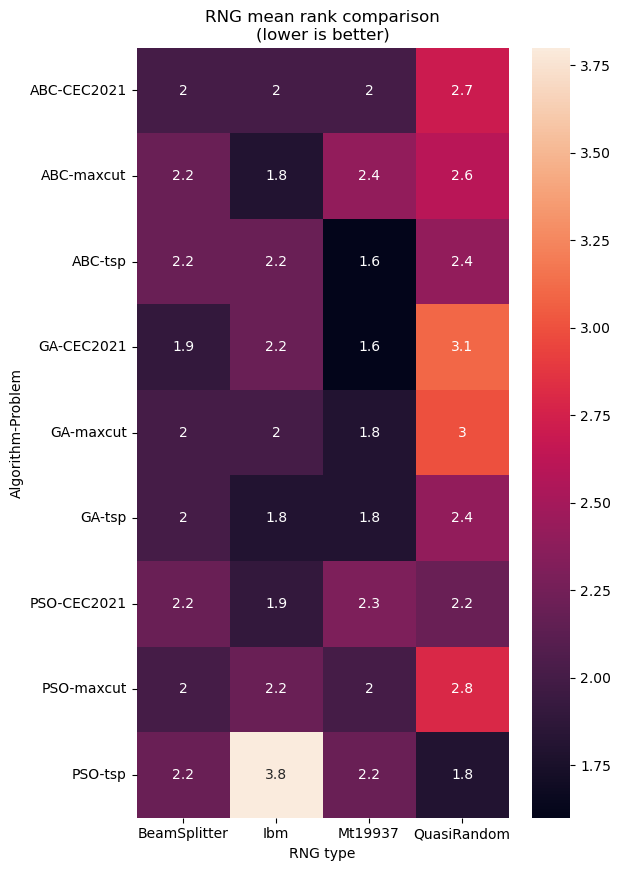

In [18]:
plt.figure(figsize= (6,10))
plt.title(f"RNG mean rank comparison\n(lower is better)")
sns.heatmap(pd.pivot_table(save, values="rank_MOF", index= ["algo","problem"], columns="rng"), annot=True)
plt.xlabel("RNG type")
plt.ylabel("Algorithm-Problem")
plt.plot()

The steps below are develop to apply Friedman Rank test from SciPy library.
And extract p-value to report algorithm is sensitive to RNG types or not.

In [19]:
from scipy.stats import *

In [20]:
def friedManTest(input):
    reshape_input = np.array(input).reshape(-1,4).T
    print(reshape_input)
    res = friedmanchisquare(*reshape_input)
    return res.pvalue

[[1. 2. 1. 2. 3. 3. 2. 2. 2. 2.]
 [1. 1. 2. 3. 2. 2. 3. 2. 3. 1.]
 [2. 3. 2. 1. 1. 4. 1. 3. 1. 2.]
 [3. 4. 2. 4. 4. 1. 3. 1. 4. 1.]]
[[3. 3. 2. 1. 2.]
 [1. 4. 1. 2. 1.]
 [3. 2. 3. 1. 3.]
 [2. 1. 3. 3. 4.]]
[[1. 4. 3. 1. 2.]
 [3. 2. 2. 1. 3.]
 [1. 1. 1. 1. 4.]
 [2. 3. 4. 2. 1.]]
[[2. 2. 2. 2. 2. 3. 2. 1. 1. 2.]
 [1. 1. 2. 3. 2. 4. 3. 2. 3. 1.]
 [1. 2. 1. 1. 1. 1. 1. 3. 2. 3.]
 [2. 3. 3. 4. 3. 2. 4. 4. 2. 4.]]
[[3. 3. 1. 2. 1.]
 [1. 2. 2. 3. 2.]
 [2. 1. 2. 1. 3.]
 [4. 2. 3. 2. 4.]]
[[3. 1. 2. 2. 2.]
 [1. 2. 1. 4. 1.]
 [2. 1. 3. 1. 2.]
 [2. 2. 4. 3. 1.]]
[[4. 1. 2. 3. 1. 2. 3. 2. 3. 1.]
 [2. 2. 2. 1. 2. 3. 2. 1. 2. 2.]
 [3. 3. 1. 2. 1. 3. 1. 3. 3. 3.]
 [1. 2. 3. 4. 3. 1. 1. 4. 1. 2.]]
[[1. 2. 3. 2. 2.]
 [2. 4. 1. 1. 3.]
 [3. 1. 2. 3. 1.]
 [4. 3. 2. 4. 1.]]
[[3. 1. 3. 2. 2.]
 [4. 4. 4. 3. 4.]
 [2. 3. 2. 1. 3.]
 [1. 2. 1. 4. 1.]]


<Axes: title={'center': 'p-value'}, ylabel='algo-problem'>

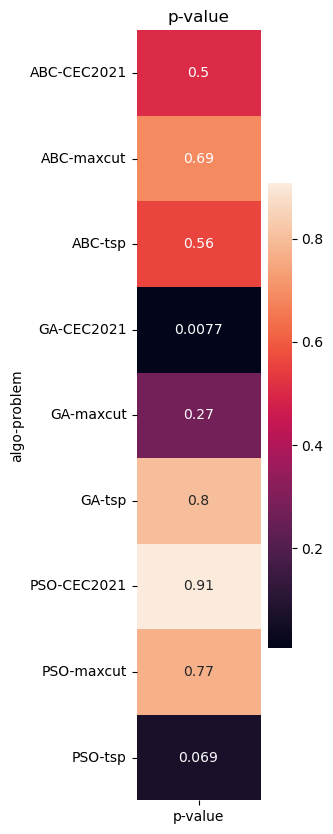

In [ ]:
# reshape friedman rank table into (rows, columns) = (RNGs, testCase) of any algo-problems then use friedman test.
pvalues = pd.pivot_table(save, values="rank_MOF", index= ["algo","problem"], aggfunc = friedManTest).reset_index().rename(columns={"rank_MOF": "p-value"})
plt.figure(figsize= (2,10))
plt.title(f"p-value")
sns.heatmap(pd.pivot_table(pvalues, values="p-value", index= ["algo","problem"]), annot=True)

In [ ]:
# report as table
pd.pivot_table(save, values="rank_MOF", index= ["algo", "problem"], aggfunc = friedManTest).rename(columns={"rank_MOF": "p-value"})

[[1. 2. 1. 2. 3. 3. 2. 2. 2. 2.]
 [1. 1. 2. 3. 2. 2. 3. 2. 3. 1.]
 [2. 3. 2. 1. 1. 4. 1. 3. 1. 2.]
 [3. 4. 2. 4. 4. 1. 3. 1. 4. 1.]]
[[3. 3. 2. 1. 2.]
 [1. 4. 1. 2. 1.]
 [3. 2. 3. 1. 3.]
 [2. 1. 3. 3. 4.]]
[[1. 4. 3. 1. 2.]
 [3. 2. 2. 1. 3.]
 [1. 1. 1. 1. 4.]
 [2. 3. 4. 2. 1.]]
[[2. 2. 2. 2. 2. 3. 2. 1. 1. 2.]
 [1. 1. 2. 3. 2. 4. 3. 2. 3. 1.]
 [1. 2. 1. 1. 1. 1. 1. 3. 2. 3.]
 [2. 3. 3. 4. 3. 2. 4. 4. 2. 4.]]
[[3. 3. 1. 2. 1.]
 [1. 2. 2. 3. 2.]
 [2. 1. 2. 1. 3.]
 [4. 2. 3. 2. 4.]]
[[3. 1. 2. 2. 2.]
 [1. 2. 1. 4. 1.]
 [2. 1. 3. 1. 2.]
 [2. 2. 4. 3. 1.]]
[[4. 1. 2. 3. 1. 2. 3. 2. 3. 1.]
 [2. 2. 2. 1. 2. 3. 2. 1. 2. 2.]
 [3. 3. 1. 2. 1. 3. 1. 3. 3. 3.]
 [1. 2. 3. 4. 3. 1. 1. 4. 1. 2.]]
[[1. 2. 3. 2. 2.]
 [2. 4. 1. 1. 3.]
 [3. 1. 2. 3. 1.]
 [4. 3. 2. 4. 1.]]
[[3. 1. 3. 2. 2.]
 [4. 4. 4. 3. 4.]
 [2. 3. 2. 1. 3.]
 [1. 2. 1. 4. 1.]]


p-value
algo problem          
ABC  CEC2021  0.504776
     maxcut   0.689656
     tsp      0.558686
GA   CEC2021  0.007718
     maxcut   0.273183
     tsp      0.801252
PSO  CEC2021  0.908139
     maxcut   0.771043
     tsp      0.069391

In [ ]:
# report pvalues as algorithm level
pvalues = pd.pivot_table(save, values="rank_MOF", index= ["algo"], aggfunc = friedManTest).reset_index().rename(columns={"rank_MOF": "p-value"})
pvalues

[[1. 2. 1. 2. 3. 3. 2. 2. 2. 2. 3. 3. 2. 1. 2. 1. 4. 3. 1. 2.]
 [1. 1. 2. 3. 2. 2. 3. 2. 3. 1. 1. 4. 1. 2. 1. 3. 2. 2. 1. 3.]
 [2. 3. 2. 1. 1. 4. 1. 3. 1. 2. 3. 2. 3. 1. 3. 1. 1. 1. 1. 4.]
 [3. 4. 2. 4. 4. 1. 3. 1. 4. 1. 2. 1. 3. 3. 4. 2. 3. 4. 2. 1.]]
[[2. 2. 2. 2. 2. 3. 2. 1. 1. 2. 3. 3. 1. 2. 1. 3. 1. 2. 2. 2.]
 [1. 1. 2. 3. 2. 4. 3. 2. 3. 1. 1. 2. 2. 3. 2. 1. 2. 1. 4. 1.]
 [1. 2. 1. 1. 1. 1. 1. 3. 2. 3. 2. 1. 2. 1. 3. 2. 1. 3. 1. 2.]
 [2. 3. 3. 4. 3. 2. 4. 4. 2. 4. 4. 2. 3. 2. 4. 2. 2. 4. 3. 1.]]
[[4. 1. 2. 3. 1. 2. 3. 2. 3. 1. 1. 2. 3. 2. 2. 3. 1. 3. 2. 2.]
 [2. 2. 2. 1. 2. 3. 2. 1. 2. 2. 2. 4. 1. 1. 3. 4. 4. 4. 3. 4.]
 [3. 3. 1. 2. 1. 3. 1. 3. 3. 3. 3. 1. 2. 3. 1. 2. 3. 2. 1. 3.]
 [1. 2. 3. 4. 3. 1. 1. 4. 1. 2. 4. 3. 2. 4. 1. 1. 2. 1. 4. 1.]]


,algo,p-value
0,ABC,0.263240
1,GA,0.002051
2,PSO,0.864180


In [ ]:
# this code below average friedman rank over RNG types as PRNG and QRNG
# It's easy to interpretation, but beware of usage.
# please note that our work has Quasirandom perfroms badly 
# it might lead to misunderstanding/ false claim of this plot that QRNGs ar better than PRNGs. 

# save.loc[save["rng"] == "BeamSplitter", "rng"] = "quantum"
# save.loc[save["rng"] == "Ibm", "rng"] = "quantum"
# save.loc[save["rng"] == "Mt19937", "rng"] = "pseudo"
# save.loc[save["rng"] == "QuasiRandom", "rng"] = "pseudo"

In [ ]:
# pd.pivot_table(save, values="rank_MOF", index= ["algo","problem"], columns="rng")

rng           pseudo  quantum
algo problem                 
ABC  CEC2021    2.35     2.00
     maxcut     2.50     2.00
     tsp        2.00     2.20
GA   CEC2021    2.35     2.05
     maxcut     2.40     2.00
     tsp        2.10     1.90
PSO  CEC2021    2.25     2.05
     maxcut     2.40     2.10
     tsp        2.00     3.00

[]

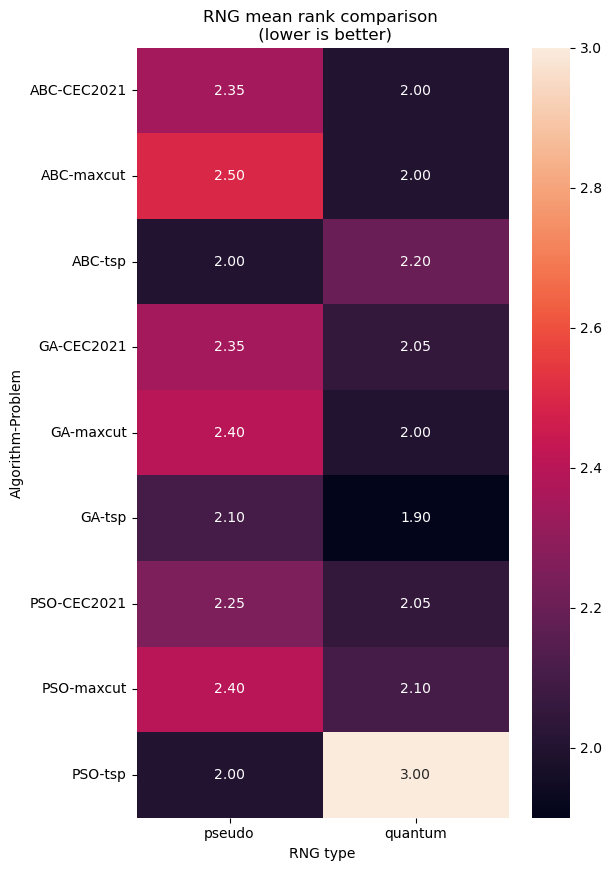

In [ ]:
# plt.figure(figsize=(6,10))
# plt.title(f"RNG mean rank comparison \n (lower is better)")
# sns.heatmap(pd.pivot_table(save, values="rank_MOF", index= ["algo","problem"], columns="rng"), annot=True, fmt = '.2f')
# plt.xlabel("RNG type")
# # plt.xticks(rotation=60)
# plt.ylabel("Algorithm-Problem")
# # plt.yticks(rotation=60)
# plt.plot()

In [29]:
plt.figure(figsize=(10,2))
sns.heatmap(pd.pivot_table(pvalues, values="p-value", index= ["algo","problem"]).T, annot=True, fmt = '.4f')
plt.xlabel("Algorithm-Problem")
plt.xticks(rotation=60)

KeyError: 'problem'

<Figure size 1000x200 with 0 Axes>

[]

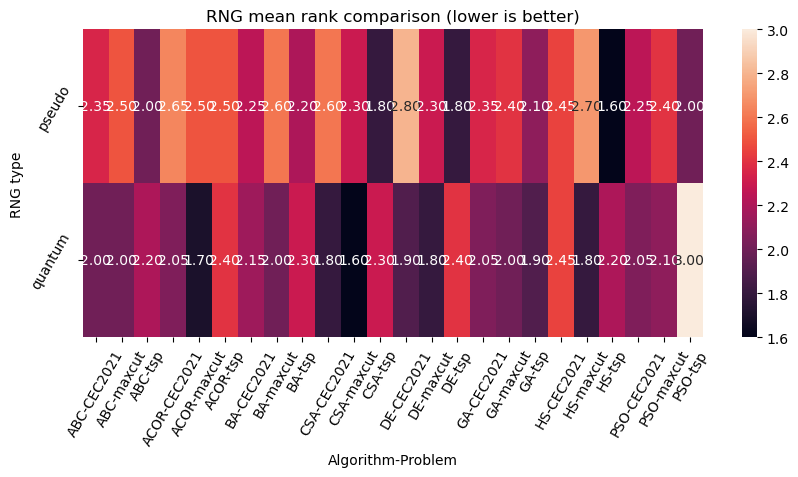

In [ ]:
plt.figure(figsize=(10,4))
plt.title(f"RNG mean rank comparison (lower is better)")
sns.heatmap(pd.pivot_table(save, values="rank_MOF", index= ["algo","problem"], columns="rng").T, annot=True, fmt = '.2f')
plt.xlabel("Algorithm-Problem")
plt.xticks(rotation=60)
plt.ylabel("RNG type")
plt.yticks(rotation=60)
plt.plot()